In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('https://storage.googleapis.com/the_public_bucket/wine-clustering.csv')

## ¿Qué sucederá si no estandarizamos los datos?

### Aplicamos clusterización

### Aplicamos el método del codo y silhouette_score para identificar el número adecuado de k

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

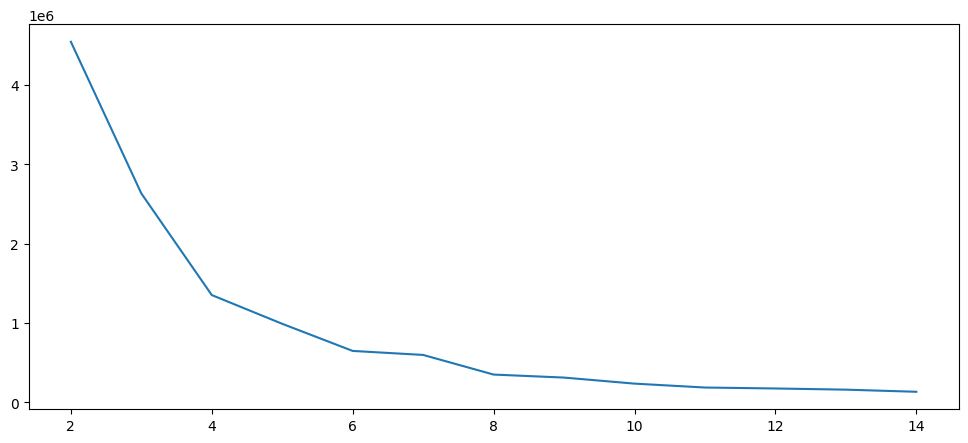

In [65]:
SSD = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    SSD.append(km.inertia_)
plt.figure(figsize=(12,5))
plt.plot(K,SSD)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()


El gráfico nos dice que el ideal debería ser 4 

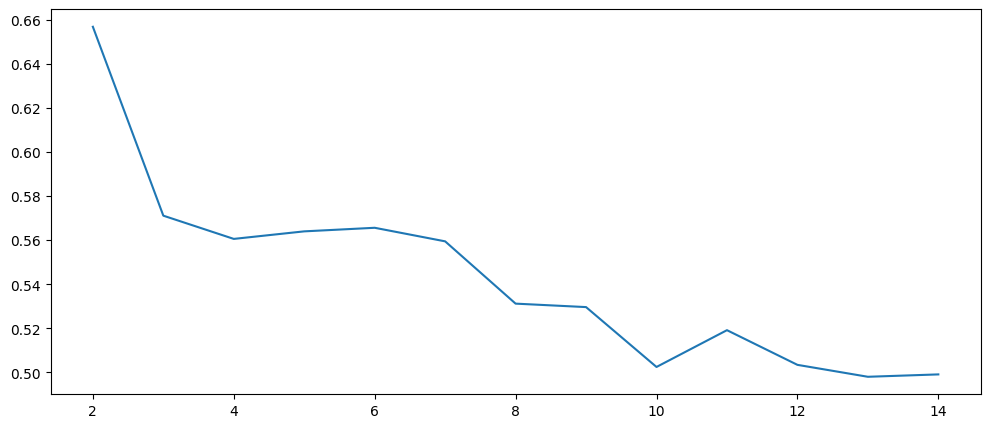

In [66]:
silhouette_scores= []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    y = km.predict(df)
    silhouette_scores.append(silhouette_score(df,y))
plt.figure(figsize=(12,5))
plt.plot(K,silhouette_scores)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

El gráfico nos dice que el score más alto es el 2 y luego el 3

### Al parecer el **Silhouette Score** es diferente al resultado del **Elbow**

## Ahora intentemos con estandarización

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


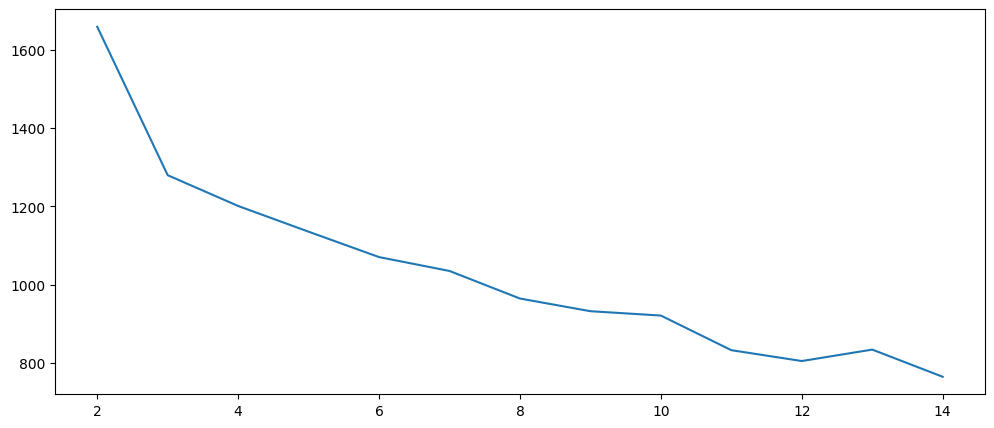

In [69]:
SSD = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    SSD.append(km.inertia_)
plt.figure(figsize=(12,5))
plt.plot(K,SSD)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

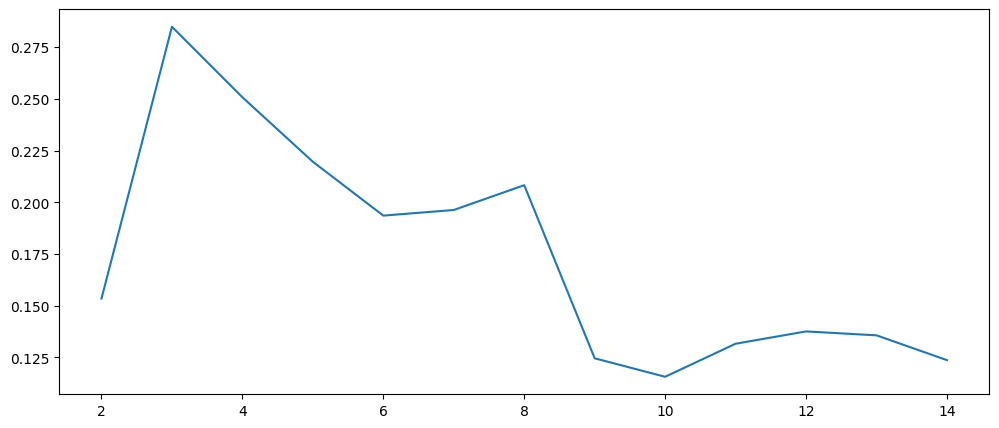

In [70]:
silhouette_scores= []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    y = km.predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data,y))
plt.figure(figsize=(12,5))
plt.plot(K,silhouette_scores)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

## ¡¡Ahora sí nos cuadra ambos metodos!!

### 👉El número ideal de clusters es 3

In [83]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
scaled_data['cluster'] = kmeans.labels_
scaled_data


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1
